<a href="https://colab.research.google.com/github/JalajakshiP/WIDS-Agent-Jackie-Reinforcement-Learning/blob/main/week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING LIBRARIES**

In [147]:
import numpy as np
import matplotlib.pyplot as plt
import random

**CREATION OF ARM AND MULTIBANDIT**

In [148]:
class Arm:
    def __init__(self, p):
        self.p = p

    def pull(self):
        return np.random.binomial(1, self.p)

class MultiBandit:
    def __init__(self, probs = [0.1, 0.2, 0.7, 0.5]):
        self.__arms = [Arm(p) for p in probs]
        self.__regret = 0
        self.__maxp = max(probs)

    def num_arms(self):
        return len(self.__arms)

    def pull(self, arm_num):
        reward = self.__arms[arm_num].pull()
        self.__regret += self.__maxp-self.__arms[arm_num].p
        return reward

    def regret(self):
        return self.__regret

    def reset(self):
        self.__regret=0

**EPSILON GREEDY ALGORITHM**

In [149]:
class EpsilonGreedyAlgorithm:
    def __init__(self, num_arms, horizon, epsilon):
        # Initialize our algorithm
        self.num_arms = num_arms                    # Number of arms present in the bandit
        self.horizon = horizon                      # Total Horizon of the algorithm
        self.epsilon = epsilon                      # epsiolon value for the algorithm
        self.timestep = 0                           # The current timestep while running the algorithm
        self.arm_pulls = np.zeros(num_arms)         # History of number of times each arm was pulled
        self.arm_rewards = np.zeros(num_arms)       # History of the total reward accumulated by each arm
        self.regrets = np.zeros(horizon)            # Total regret at each timestep of the horizon

    def give_best_arm(self):
        # Return the arm which the algorithm considers to be the best arm at end of algorithm
        max=0
        for i in range(self.num_arms):
            if self.arm_rewards[max]/self.arm_pulls[max] < self.arm_rewards[i]/self.arm_pulls[i]:
              max=i
        return max

    def select_arm(self):
        # Select arm at each time step. You are supposed to return the index of which
        # arm has been selected to pull at this timestep
        max=0
        for i in range(self.num_arms):
          if self.arm_pulls[i]!=0 and self.arm_pulls[max]!=0:
            if self.arm_rewards[max]/self.arm_pulls[max] < self.arm_rewards[i]/self.arm_pulls[i]:
              max=i
        if np.random.rand() < self.epsilon:
          return np.random.randint(0,self.num_arms)
        else:
          return max

    def run_algorithm(self, bandit):
        # This is the proper algorithm. Already completed
        for _ in range(self.horizon):
            arm_to_pull = self.select_arm()             # Select the arm using the algorithm
            reward = bandit.pull(arm_to_pull)           # Pull the arm and find our the reward
            self.arm_pulls[arm_to_pull] += 1            # Update the arm pull count and arm reward count
            self.arm_rewards[arm_to_pull] += reward
            self.timestep += 1                          # Update the timestep
            self.regrets[_] = bandit.regret()           # Store the regret values at each timestep

    def plot(self):

        # Plot the regret graph. Label the X and Y Axis properly using matplotlib library
        timesteps=np.arange(self.horizon)
        plt.plot(timesteps,self.regrets)
        plt.xlabel('timesteps')
        plt.ylabel('Total regret')
        plt.title('epsilon greedy alg :Total regrets vs timesteps')
        plt.show()
        pass

Total Regret after 100 timesteps: 26.899999999999995 with assumed best arm 2


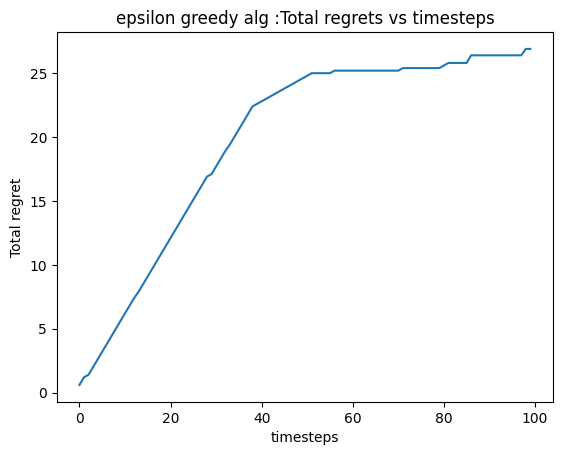

In [150]:


# Define a MultiBandit instance
bandit = MultiBandit()
# bandit = MultiBandit([0.1, 0.5, 0.8, 0.3, 0.4])   # Make custom Multi-armed Bandit. Should work while grading code

# Set the horizon size
H = 100

# Create  Algorithm instance
algorithm = EpsilonGreedyAlgorithm(num_arms=bandit.num_arms(), horizon=H, epsilon=0.2)

# Run the algorithm
algorithm.run_algorithm(bandit)

# Display total regret
print(f"Total Regret after {H} timesteps: {bandit.regret()} with assumed best arm {algorithm.give_best_arm()}")
algorithm.plot()



**UCB ALGORITHM**

In [151]:
class UCBAlgorithm:
    def __init__(self, num_arms, horizon):
        # Initialize our algorithm
        self.num_arms = num_arms                    # Number of arms present in the bandit
        self.horizon = horizon                      # Total Horizon of the algorithm
        self.timestep = 0                          # The current timestep while running the algorithm
        self.arm_pulls = np.zeros(num_arms)         # History of number of times each arm was pulled
        self.arm_rewards = np.zeros(num_arms)       # History of the total reward accumulated by each arm
        self.regrets = np.zeros(horizon)            # Total regret at each timestep of the horizon

    def give_best_arm(self):
        # Return the arm which the algorithm considers to be the best arm at end of algorithm
        max=0
        for i in range(self.num_arms):
            if self.arm_rewards[max]/self.arm_pulls[max] < self.arm_rewards[i]/self.arm_pulls[i]:
              max=i
        return max
        pass

    def select_arm(self):
        # Select arm at each time step. You are supposed to return the index of which
        # arm has been selected to pull at this timestep
        if self.timestep < self.num_arms:
            return self.timestep
        else:
          max=0
          for i in range(self.num_arms):
              if (self.arm_rewards[max]/self.arm_pulls[max]) + np.sqrt(2*np.log(self.timestep)/self.arm_pulls[max])  < (self.arm_rewards[i]/self.arm_pulls[i])+ np.sqrt(2*np.log(self.timestep)/self.arm_pulls[i]):
                max=i
          return max
        pass

    def run_algorithm(self, bandit):
        # This is the proper algorithm. Already completed
        for _ in range(self.horizon):
            arm_to_pull = self.select_arm()             # Select the arm using the algorithm
            reward = bandit.pull(arm_to_pull)          # Pull the arm and find our the reward
            self.arm_pulls[arm_to_pull] += 1         # Update the arm pull count and arm reward count
            self.arm_rewards[arm_to_pull] += reward
            self.timestep += 1                          # Update the timestep
            self.regrets[_] = bandit.regret()           # Store the regret values at each timestep

    def plot(self):
        # Plot the regret graph. Label the X and Y Axis properly using matplotlib library
        timesteps=np.arange(self.horizon)
        plt.plot(timesteps,self.regrets)
        plt.xlabel('timesteps')
        plt.ylabel('Total regret')
        plt.title('UCB alg: Total regrets vs timesteps')
        plt.show()
        pass


Total Regret after 100 timesteps: 18.699999999999992 with assumed best arm 2


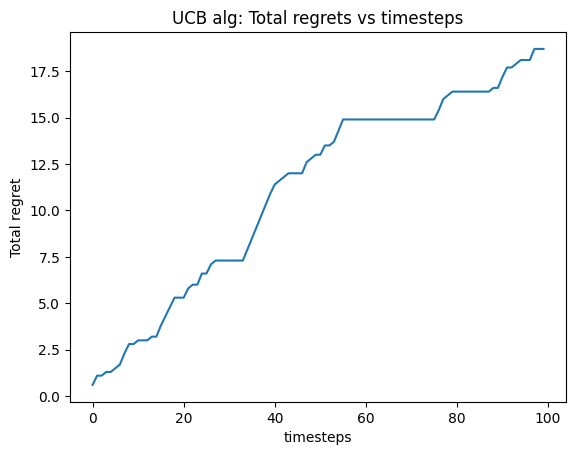

In [152]:
# Define a MultiBandit instance
bandit = MultiBandit()
# bandit = MultiBandit([0.1, 0.5, 0.8, 0.3, 0.4])   # Make custom Multi-armed Bandit. Should work while grading code

# Set the horizon size
H = 100

# Create  Algorithm instance
algorithm = UCBAlgorithm(num_arms=bandit.num_arms(), horizon=H)

# Run the algorithm
algorithm.run_algorithm(bandit)

# Display total regret
print(f"Total Regret after {H} timesteps: {bandit.regret()} with assumed best arm {algorithm.give_best_arm()}")
algorithm.plot()



**THOMPSON SAMPLING ALGORITHM**

In [153]:
class ThompsonSamplingAlgorithm:
    def __init__(self, num_arms, horizon):
        # Initialize our algorithm
        self.num_arms = num_arms                    # Number of arms present in the bandit
        self.horizon = horizon                      # Total Horizon of the algorithm
        self.arm_pulls = np.zeros(num_arms)         # History of number of times each arm was pulled
        self.arm_rewards = np.zeros(num_arms)       # History of the total reward accumulated by each arm
        self.timestep = 0                          # The current timestep while running the algorithm
        self.regrets = np.zeros(horizon)            # Total regret at each timestep of the horizon
        self.success=np.zeros(num_arms)
        self.failures=np.zeros(num_arms)

    def give_best_arm(self):
        # Return the arm which the algorithm considers to be the best arm at end of algorithm
        max=0
        for i in range(self.num_arms):
            if self.arm_rewards[max]/self.arm_pulls[max] < self.arm_rewards[i]/self.arm_pulls[i]:
              max=i
        return max


    def select_arm(self):
        # Select arm at each time step. You are supposed to return the index of which
        # arm has been selected to pull at this timestep
        max=0
        index=0
        for i in range(self.num_arms):
          random_beta = random.betavariate(self.success[i] + 1, self.failures[i] + 1)
          if random_beta > max:
            max = random_beta
            index = i
        return index

    def run_algorithm(self, bandit):
        # This is the proper algorithm. Already completed
        for _ in range(self.horizon):
            arm_to_pull = self.select_arm()             # Select the arm using the algorithm
            reward = bandit.pull(arm_to_pull)          # Pull the arm and find our the reward
            if reward==1 :
              self.success[arm_to_pull]+=1
            else:
              self.failures[arm_to_pull]+=1
            self.arm_pulls[arm_to_pull] += 1         # Update the arm pull count and arm reward count
            self.arm_rewards[arm_to_pull] += reward      # Update the arm pull count and arm reward count
            self.timestep += 1                          # Update the timestep
            self.regrets[_] = bandit.regret()           # Store the regret values at each timestep

    def plot(self):
        # Plot the regret graph. Label the X and Y Axis properly using matplotlib library
        timesteps=np.arange(self.horizon)
        plt.plot(timesteps,self.regrets)
        plt.xlabel('timesteps')
        plt.ylabel('Total regret')
        plt.title('thompson sampling alg:Total regrets vs timesteps')
        plt.show()
        pass


Total Regret after 100 timesteps: 11.29999999999999 with assumed best arm 2


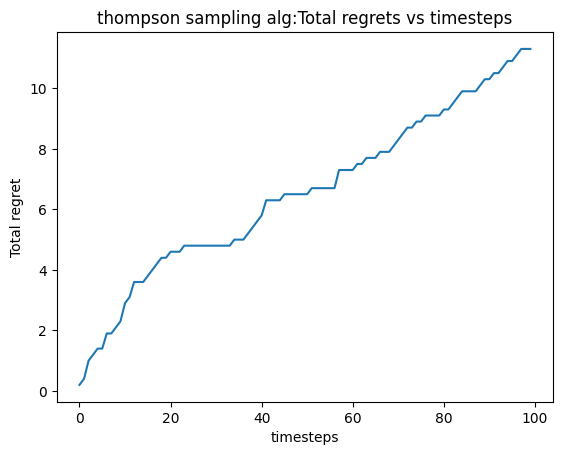

In [154]:


# Define a MultiBandit instance
bandit = MultiBandit()
# bandit = MultiBandit([0.1, 0.5, 0.8, 0.3, 0.4])   # Make custom Multi-armed Bandit. Should work while grading code

# Set the horizon size
H = 100

# Create  Algorithm instance
algorithm = ThompsonSamplingAlgorithm(num_arms=bandit.num_arms(), horizon=H)

# Run the algorithm
algorithm.run_algorithm(bandit)

# Display total regret
print(f"Total Regret after {H} timesteps: {bandit.regret()} with assumed best arm {algorithm.give_best_arm()}")
algorithm.plot()


**CREATION OF CUSTOM BANDIT AND COMPARISON OF ABOVE ALGORITHMS**

Using Epsilon greedy algorithm with epsilon=0.2, Total Regret after 10000 timesteps : 725.2000000000083 with assumed best arm 0


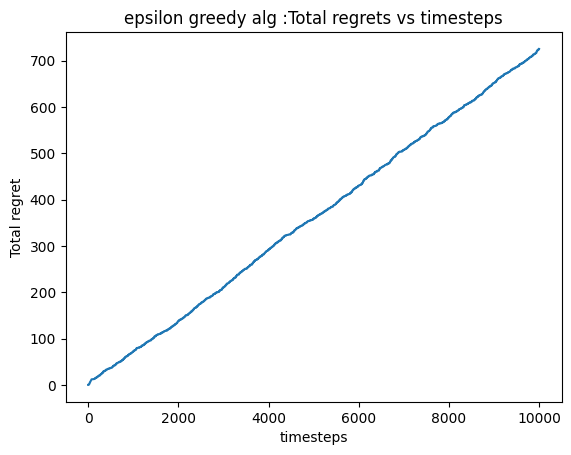

Using UCB algorithm, Total Regret after 10000 timesteps: 132.50000000000026 with assumed best arm 0


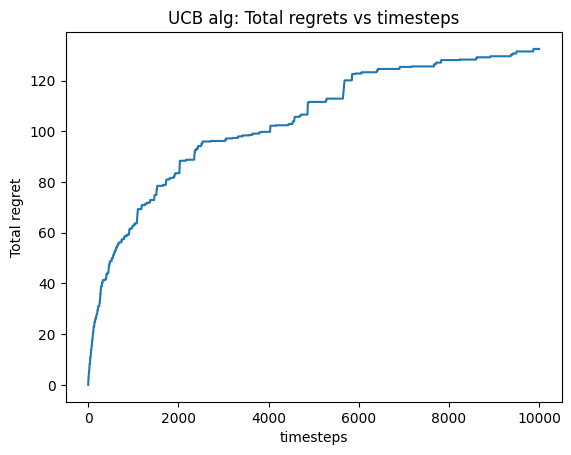

Using Thompson Sampling algorithm, Total Regret after 10000 timesteps: 20.500000000000004 with assumed best arm 0


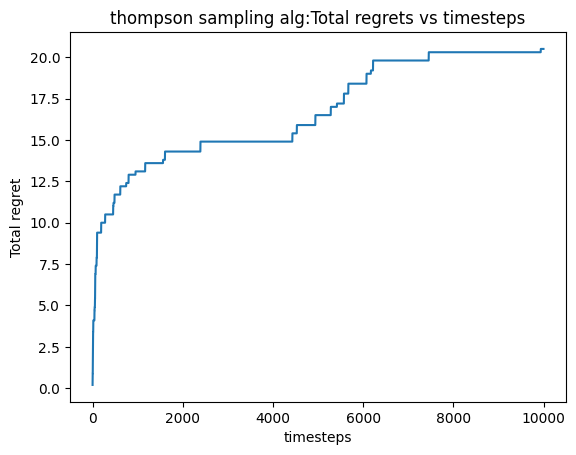

In [155]:
# Define a MultiBandit instance
#bandit = MultiBandit()
bandit= MultiBandit([0.9, 0.7, 0.4, 0.3, 0.4])   # Make custom Multi-armed Bandit. Should work while grading code

# Set the horizon size
H = 10000

# Create  Algorithm instance
algorithm0 =EpsilonGreedyAlgorithm(num_arms=bandit.num_arms(), horizon=H,epsilon =0.2)
algorithm1 =UCBAlgorithm(num_arms=bandit.num_arms(), horizon=H)
algorithm2 =ThompsonSamplingAlgorithm(num_arms=bandit.num_arms(), horizon=H)

# Run the algorithm
algorithm0.run_algorithm(bandit)
# Display total regret
print(f"Using Epsilon greedy algorithm with epsilon=0.2, Total Regret after {H} timesteps : {bandit.regret()} with assumed best arm {algorithm0.give_best_arm()}")
algorithm0.plot()

bandit.reset()

algorithm1.run_algorithm(bandit)
# Display total regret
print(f"Using UCB algorithm, Total Regret after {H} timesteps: {bandit.regret()} with assumed best arm {algorithm1.give_best_arm()}")
algorithm1.plot()

bandit.reset()

algorithm2.run_algorithm(bandit)
# Display total regret
print(f"Using Thompson Sampling algorithm, Total Regret after {H} timesteps: {bandit.regret()} with assumed best arm {algorithm2.give_best_arm()}")
algorithm2.plot()